<a href="https://colab.research.google.com/github/Daniellucasgonzaga/BCC19-DanielGonzaga/blob/main/Tarefa10DanielGonzaga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daniel Lucas de Oliveira Gonzaga

1) Para este item você deverá usar o arquivo com todos os resultados do campeonato Brasileiro de futebol de 2018 (tabelaBrasileirao2018.csv encontrado na pasta aula5/dados) (dados obtidos desta e desta página da Wikipedia).

Calcule (e mostre o resultado) a porcentagem de jogos que o time da casa (mandante) ganhou o jogo.

Calcule (e mostre o resultado) a porcentagem de jogos que o time da casa (mandante) não perdeu o jogo.

Como o nome da coluna tem espaço em branco, ao usar o query, colocar o nome da coluna entre ``.

In [ ]:
import pandas as pd

brfut = pd.read_csv ('https://raw.githubusercontent.com/Daniellucasgonzaga/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv')
itens = len(brfut)                                              # calcula o total de jogos fornecidos pela tabela
placar1 = []                                                    # cria uma lista, por hora vazia
placar2 = []                                                    # cria uma lista, por hora vazia

for mandante in brfut['Placar do Mandante']:                    # atribui a coluna Placar do Mandante a "mandante"
  if brfut['Placar do Visitante'].any().all() < mandante:       # Se o placar do mandante for maior que o do visitante então:
    placar1.append(mandante)                                    # adiciona a lista mandante á lista placar

  if brfut['Placar do Visitante'].any().all() <= mandante:      # Se o placar do mandante for maior ou igual que o do visitante então:
    placar2.append(mandante)                                    # adiciona a lista mandante á lista placar

vitoria1 = len(placar1) * 100 / itens                           # calcula a procentagem de vitoria do mandante
print(f"O mandante ganhou {round(vitoria1,2)} % dos jogos")     # mostra a % arredondada de vitorias do mandante 

vitoria2 = len(placar2) * 100 / itens                           # calcula a procentagem de jogos que o mandante não perdeu
print(f"O mandante não perdeu {round(vitoria2,2)} % dos jogos") # mostra a % arredondada de vitorias do mandante 


O mandante ganhou 41.05 % dos jogos
O mandante não perdeu 76.58 % dos jogos


**2)**  Para este item você deverá usar o arquivo com a [taxa de inflação mensal (IGP-DI) no Brasil de fevereiro de 1944 a junho de 2019](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/inflacaoMensal.csv) (dados disponibilizados por Ipeadata). 

- Faça um gráfico da taxa de inflação mensal em função do tempo.
- Mostre em que mês e ano e qual foi a maior taxa de inflação mensal medida neste período (fevereiro de 1944 a junho de 2019).

Dica: para fazer o gráfico, note que um mês corresponde a um doze avos de ano. Para facilitar a criação do gráfico você pode criar uma outra coluna que corresponda ao ano adicionado da fração correspondente ao mês.

Maior taxa de inflação de fevereiro de 1944 a junho de 2019 foi:
      Ano  Mês  Inflação
553  1990    3     81.32


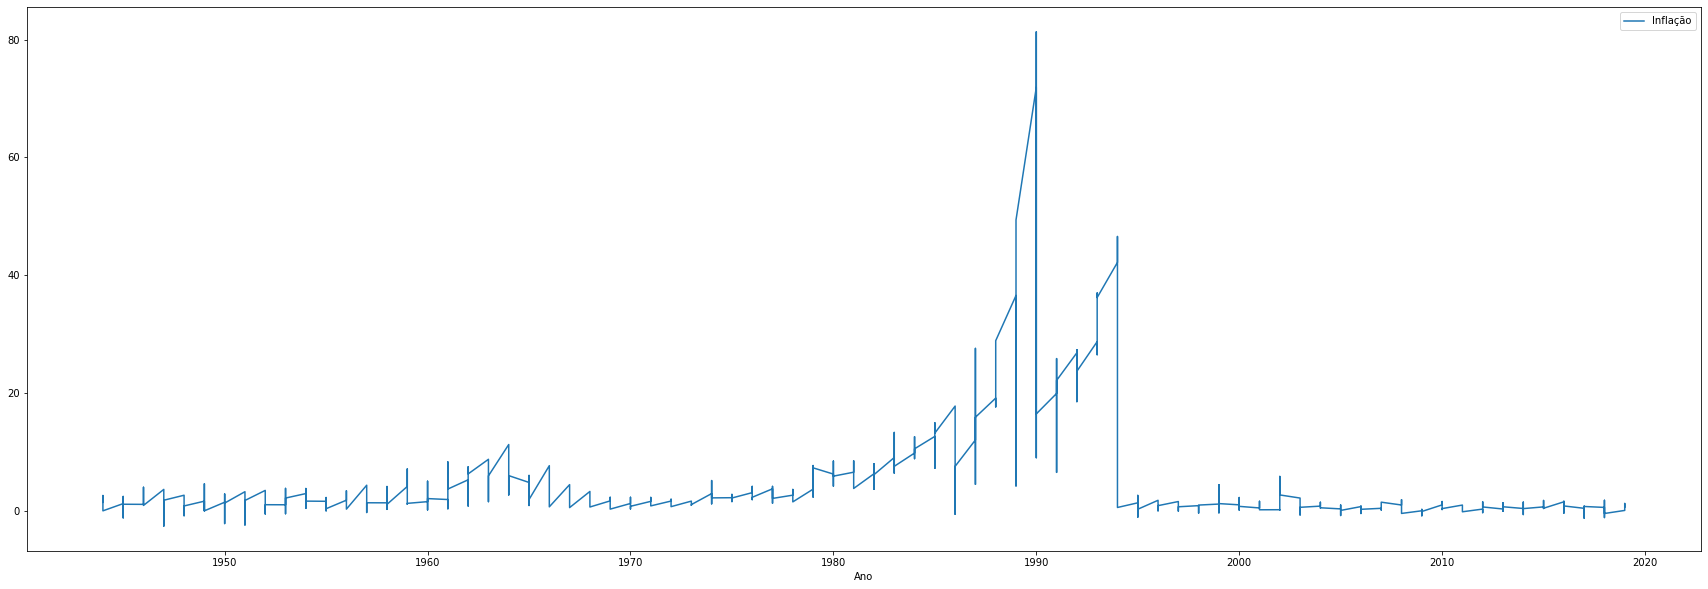

In [ ]:
import pandas as pd
import numpy as np


inf = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/inflacaoMensal.csv')
infmax = max(inf['Inflação'])                                              # calcula o valor maximo da coluna Inflação
inf.plot(kind='line', x='Ano', y='Inflação', figsize=(30,10))              # plota o grafico da inflação em função do ano
print(f"Maior taxa de inflação de fevereiro de 1944 a junho de 2019 foi:") # escreve um cabeçalho para a resposta

array = np.where(inf['Inflação'] == infmax)                                # mostra em qual linha a inflação maxima está na tabela / atribui o nome "array" a ela
print(inf.iloc[array])                                                     # mostra os dados da tabela somente na linha estabelecida pelo "array"





**3)** Para este item você pode usar [esse histórico de visualização do Netflix](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/netflix.csv) ou, se você tiver acesso ao Netflix, usar o seu [histórico](https://www.netflix.com/viewingactivity) (após entrar com a sua senha, role até o final da página e clique em "Baixar tudo").

   + Mostre quais são os 10 programas mais vistos.
   + Em qual mês do ano foi assistido mais programas? 
    
Sugestão: No seu notebook, depois do comando para carregar o arquivo, coloque a seguinte sequência de instruções:

```python
data['Categoria'] = 'Filme'  
data['Categoria'][data['Title'].str.contains(": Temporada|: Stranger|: Parte")] = 'Série'  
data['Programa'] = data['Title']  
data[['Programa','Episódio']] = data[data['Categoria']=='Série']['Title'].str.split(pat = ': Temporada|: Stranger Things|: Parte', expand = True, n = 1)   
data.loc[data['Categoria']=='Filme', 'Programa'] = data.loc[data['Categoria']=='Filme', 'Title']  
data = data.drop(columns = 'Title')  
```
A sequência de instruções acima cria uma coluna com o tipo do programa (Filme/Série), uma coluna com o nome do programa e uma outra coluna com o nome do episódio (no caso de ser uma série). Isso facilitará realizar a tarefa.

Na sequência acima, *data* é o nome da variável na qual foi guardado o DataFrame com a informação vinda do arquivo de histórico. Se você der outro nome, mude o nome da variável no código acima. 

Pode ser que o seu arquivo esteja em português. Nesse caso, o campo 'Title' terá o nome 'Título' e você deverá alterar o código acima substituindo 'Title' por 'Título'.


In [14]:
import pandas as pd

# importa o dataframe 
data = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/netflix.csv')

# linhas de código fornecidas pelo exercício
data['Categoria'] = 'Filme'  
data['Categoria'][data['Title'].str.contains(": Temporada|: Stranger|: Parte")] = 'Série'  
data['Programa'] = data['Title']  
data[['Programa','Episódio']] = data[data['Categoria']=='Série']['Title'].str.split(pat = ': Temporada|: Stranger Things|: Parte', expand = True, n = 1)   
data.loc[data['Categoria']=='Filme', 'Programa'] = data.loc[data['Categoria']=='Filme', 'Title']  
data = data.drop(columns = 'Title')  

print("os 10 programas mais vistos foram:")                      # escreve cabeçalho
print(data['Programa'].value_counts().head(10))                  # mostra quais os 10 programas mais vistos no ano e a quantidade que foram assistidos

data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y') # transforma as datas da coluna Date de string para dia/mes/ano
print("O mês em que mais foi assistida programas foi:")          # escreve cabeçalho
print(f"Mês: {data['Date'].dt.month.value_counts().head(1)}")    # motra qual o mês em que mais foi assistido programas e a quantidade deles                                        



os 10 programas mais vistos foram:
House of Cards                           73
Jornada nas Estrelas: A nova geração     64
Star Trek: Enterprise                    63
Jornada nas Estrelas: Deep Space Nine    46
Star Trek: Discovery                     42
Jornada nas estrelas                     34
The Crown                                32
Cobra Kai                                30
Aggretsuko                               28
Downton Abbey                            25
Name: Programa, dtype: int64
O mês em que mais foi assistida programas foi:
Mês: 11    108
Name: Date, dtype: int64


**4)** Para este item você deverá usar o arquivo [com todos os resultados do campeonato Brasileiro de futebol de 2018 (tabelaBrasileirao2018.csv encontrado na pasta aula5/dados)](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv) (dados obtidos [desta](<https://pt.wikipedia.org/wiki/Resultados_do_Campeonato_Brasileiro_de_Futebol_de_2018_-_S%C3%A9rie_A_(primeiro_turno)>) e [desta](<https://pt.wikipedia.org/wiki/Resultados_do_Campeonato_Brasileiro_de_Futebol_de_2018_-_S%C3%A9rie_A_(segundo_turno)>) página da Wikipedia).

- Calcule qual foi a média de Renda para cada Estádio.
 

In [56]:
import pandas as pd

br = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv')

# Estádio Independência, Belo Horizonte 
independencia = br.query("Estádio == 'Estádio Independência, Belo Horizonte'")                  # cria uma tabela somente com o estádio selecionado
tot1 = independencia['Renda (R$)'].sum()                                                        # soma a renda de todas as colunas dessa tabela criada
l1 = len(independencia)                                                                         # armazena a quantidade total de jogos nesse estádio
M1 = tot1 / l1                                                                                  # calcula a média
print(f"A média arrecadada no estádio Independência, Belo Horizonte foi de: R$ {round(M1, 2)} por jogo") # printa o resultado

# Estádio do Maracanã, Rio de Janeiro
maraca = br.query("Estádio == 'Estádio do Maracanã, Rio de Janeiro'")                         
tot2 = maraca['Renda (R$)'].sum()                                                             
l2 = len(maraca)                                                                              
M2 = tot2 / l2                                                                                
print(f"A média arrecadada no Estádio do Maracanã, Rio de Janeiro foi de: R$ {round(M2, 2)} por jogo")

# Estádio Engenhão, Rio de Janeiro
eng = br.query("Estádio == 'Estádio Engenhão, Rio de Janeiro'")
tot3 = eng['Renda (R$)'].sum()
l3 = len(eng)
M3 = tot3 / l3
print(f"A média arrecadada no Estádio Engenhão, Rio de Janeiro foi de: R$ {round(M3, 2)} por jogo")

# Estádio Barradão, Salvador
bar = br.query("Estádio == 'Estádio Barradão, Salvador'")
tot4 = bar['Renda (R$)'].sum()
l4 = len(bar)
M4 = tot4 / l4
print(f"A média arrecadada no Estádio Barradão, Salvador foi de: R$ {round(M4, 2)} por jogo")

# Estádio Beira-Rio, Porto Alegre
beri = br.query("Estádio == 'Estádio Beira-Rio, Porto Alegre'")
tot5 = beri['Renda (R$)'].sum()
l5 = len(beri)
M5 = tot5 / l5
print(f"A média arrecadada no Estádio Beira-Rio, Porto Alegre foi de: R$ {round(M5, 2)} por jogo")

# Arena do Grêmio, Porto Alegre
ag = br.query("Estádio == 'Arena do Grêmio, Porto Alegre'")
tot6 = ag['Renda (R$)'].sum()
l6 = len(ag)
M6 = tot6 / l6
print(f"A média arrecadada na Arena do Grêmio, Porto Alegre foi de: R$ {round(M6, 2)} por jogo")

print("*** CONTINUA A MESMA LÓGICA PARA TODOS OS ESTÁDIOS... ****")

A média arrecadada no estádio Independência, Belo Horizonte foi de: R$ 185470.32 por jogo
A média arrecadada no Estádio do Maracanã, Rio de Janeiro foi de: R$ 849158.13 por jogo
A média arrecadada no Estádio Engenhão, Rio de Janeiro foi de: R$ 167022.74 por jogo
A média arrecadada no Estádio Barradão, Salvador foi de: R$ 96398.37 por jogo
A média arrecadada no Estádio Beira-Rio, Porto Alegre foi de: R$ 850073.66 por jogo
A média arrecadada na Arena do Grêmio, Porto Alegre foi de: R$ 760596.89 por jogo
*** CONTINUA A MESMA LÓGICA PARA TODOS OS ESTÁDIOS... ****
